In [4]:
from math import pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Homework 3.1.1 - Fourier Series

A periodic function with a period of $T=2$ can be decomposed into a Fourier series with the coefficients below:

$$
{\displaystyle {\begin{aligned}a_{0}= {\frac {2}{3}}\\a_{n}= {\frac {4}{\pi ^{2}n^{2}}}\\b_{n}= 0\\\end{aligned}}}
$$

$$
{\displaystyle f(t)={\frac {a_{0}}{2}}+\sum _{n=1}^{N}\left(a_{n}\cos \left({\tfrac {2\pi }{T}}nt\right)+b_{n}\sin \left({\tfrac {2\pi }{T}}nt\right)\right)}
$$

Use sufficiently large number of $N$ to reconstruct the periodict function $f(x)$ by ploting the graph for $-8 < t < 8$.


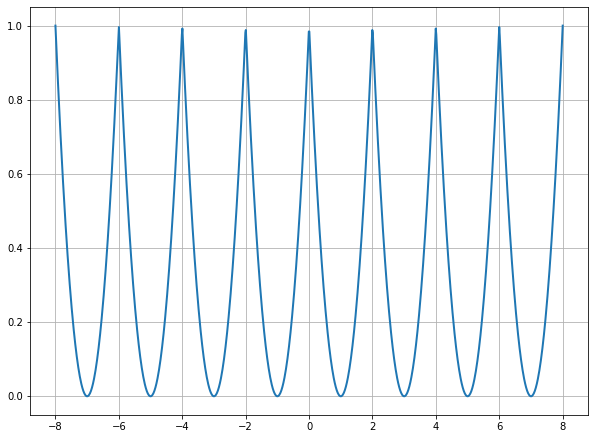

In [87]:
a_0 = 2/3
T = 2

N = 3000

def fourier(t, N, a_0=a_0, T=T):
    def a_n(n): return 4/((pi**2)*(n**2))
    def b_n(n): return 0
    def theta(n): return ((2*pi)/T)*n*t
    return (a_0)/2 + sum([(a_n(n)*cos(theta(n)) + b_n(n)*sin(theta(n))) for n in range(1, N+1)])

ts = np.linspace(-8, 8, 1000)
ys = [fourier(t, N) for t in ts]

plt.figure(figsize=(10,7.5))
plt.plot(ts, ys, lw=2)
plt.grid()

___
### Homework 3.1.2

A function $f(x)$ is given by the code and is shown below. Given that the function is periodict function between $-4 < x < 4$, find the first 100 coefficients of the Fourier series and use that coefficients to reconstruct the signal for $-16 < x < 16$.

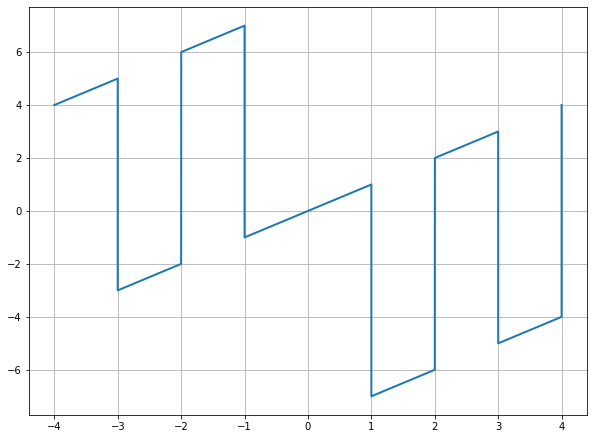

In [88]:
def f(x):
    if (x > 4) or (x < -4):
        raise Exception("Out of bound")
    elif (-4 <= x < -3) or (-2 <= x < -1):
        return x + 8
    elif (1 <= x < 2) or (3 <= x < 4):
        return x - 8
    else:
        return x

plt.figure(figsize=(10,7.5))
x = np.linspace(-4,4,100000)
y = [f(e) for e in x]
plt.plot(x, y, lw=2)
plt.grid()
plt.show()

$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{n}{\left[a_k \cos\left(\frac{k \pi x}{T}\right) + b_k \sin\left(\frac{k \pi x}{T}\right)\right]} \\
a_0 = \frac{1}{T}\int_{-T}^{T}{f(x)dx} \\
a_k = \frac{1}{T}\int_{-T}^{T}{f(x) \cos\left(\frac{k \pi x}{T}\right) dx} \\
b_k = \frac{1}{T}\int_{-T}^{T}{f(x) \sin\left(\frac{k \pi x}{T}\right) dx} \\
$$

In [89]:
from scipy.integrate import quad

T = 4

total_coefficients = 100

def get_coefficient(f=f, T=T, n=total_coefficients):
    def a(x, k): return f(x)*np.cos((k*pi*x)/T)
    def b(x, k): return f(x)*np.sin((k*pi*x)/T)

    coeff_a = [(1/T) * quad(lambda x: a(x, k), -T, T)[0] for k in range(1, n+1)]
    coeff_b = [(1/T) * quad(lambda x: b(x, k), -T, T)[0] for k in range(1, n+1)]

    return coeff_a, coeff_b

a, b = get_coefficient()
a, b

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [-2.546479089470325,
  -1.2732395447351628,
  -0.8488263631567762,
  4.456338406573069,
  -0.5092958178940638,
  -0.424413181578388,
  -0.3637827270671885,
  -0.31830988618379064,
  -0.282942121052259,
  -0.25464790894703226,
  -0.23149809904275973,
  1.4854461355243558,
  -0.19588300688233237,
  

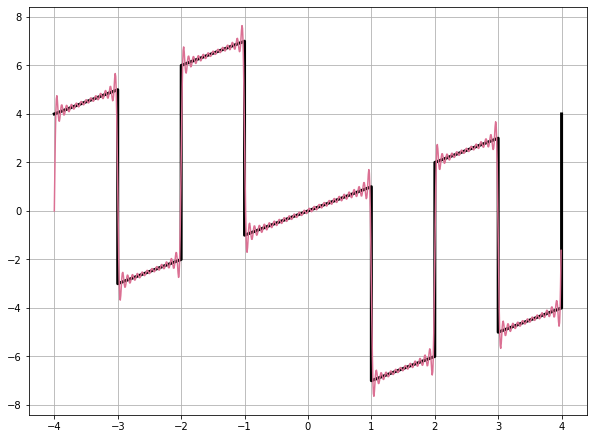

In [90]:
a_0 = 1/(T) * quad(f, -T, T)[0]

def fourier_transform(x, a_0 = a_0, a=a, b=b, T=T, f=f, n=total_coefficients):
    return a_0 + sum([a[k]*cos((k+1)*pi*x/T) + b[k]*sin((k+1)*pi*x/T) for k in range(n)])

x4 = np.linspace(-4, 4, 1000, endpoint=False)
y4 = [fourier_transform(ix) for ix in x4]

plt.figure(figsize=(10,7.5))
plt.plot(x,y,lw=3, color='black')
plt.plot(x4, y4, color='palevioletred')
plt.grid()

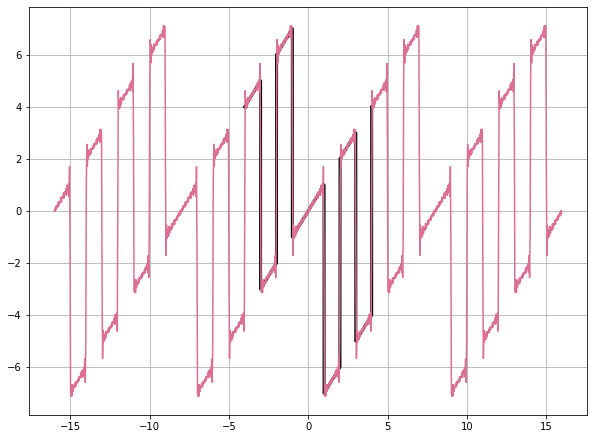

In [91]:
x16 = np.linspace(-16, 16, 1000, endpoint=False)
y16 = [fourier_transform(ix) for ix in x16]

plt.figure(figsize=(10,7.5))
plt.plot(x,y,lw=3, color='black')
plt.plot(x16, y16, color='palevioletred')
plt.grid()